In [1]:
from pathlib import Path
root = Path("c:/deldir/perfect_physics")

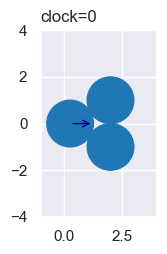

In [2]:
from sympy import sqrt, Rational
from perfect_physics import Circle, World

cue = Circle(x=2 - sqrt(3), y=0, r=1, vx=1, vy=0, m=1)
c0 = Circle(x=2, y=1, r=1, vx=0, vy=0, m=1)
c1 = Circle(x=2, y=-1, r=1, vx=0, vy=0, m=1)
world = World(circle_list=[cue, c0, c1],xlim=(-1,4), ylim=(-4,4))
world.show()
# world.run_in_place(1,show=True)
# print(cue.x)

pass

In [3]:
from copy import deepcopy
solves = []
for rng in range(2):
    world1 = World(circle_list=deepcopy(world).circle_list, rng=rng)
    world1.run_in_place(1,show=False)
    #world1.show()
    print([(c.vx, c.vy) for c in world1.circle_list])
    solves.append(deepcopy(world1))
pass

Multiple collisions: 2
[(-1/8, -sqrt(3)/8), (3/4, sqrt(3)/4), (3/8, -sqrt(3)/8)]
Multiple collisions: 2
[(-1/8, sqrt(3)/8), (3/8, sqrt(3)/8), (3/4, -sqrt(3)/4)]


In [4]:
from sympy import symbols, Eq
a_m, b_m, c_m, a_vx, b_vx, c_vx, ahat_vx, bhat_vx, chat_vx = symbols("a_m, b_m, c_m, a_vx, b_vx, c_vx, ahat_vx, bhat_vx, chat_vx")
a_vy, b_vy, c_vy, ahat_vy, bhat_vy, chat_vy = symbols("a_vy, b_vy, c_vy, ahat_vy, bhat_vy, chat_vy")

energy_before = a_m * (a_vx**2+a_vy**2) / 2 + b_m * (b_vx**2+b_vy**2) / 2 + c_m * (c_vx**2+c_vy**2) / 2
energy_after = a_m * (ahat_vx**2+ahat_vy**2) / 2 + b_m * (bhat_vx**2+bhat_vy**2) / 2 + c_m * (chat_vx**2+chat_vy**2) / 2
eq1 = Eq(energy_before, energy_after)
eq1

Eq(a_m*(a_vx**2 + a_vy**2)/2 + b_m*(b_vx**2 + b_vy**2)/2 + c_m*(c_vx**2 + c_vy**2)/2, a_m*(ahat_vx**2 + ahat_vy**2)/2 + b_m*(bhat_vx**2 + bhat_vy**2)/2 + c_m*(chat_vx**2 + chat_vy**2)/2)

In [5]:
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)
eq2

Eq(a_m*a_vx + b_m*b_vx + c_m*c_vx, a_m*ahat_vx + b_m*bhat_vx + c_m*chat_vx)

In [6]:
from sympy import nonlinsolve
from perfect_physics import save
full_bern_velocity_solutions = nonlinsolve([eq1, eq2, eq3], bhat_vy, chat_vx, chat_vy)
save(full_bern_velocity_solutions, "full_bern_velocity_solution.sympy")
full_bern_velocity_solutions

{((a_m*a_vy*b_m - a_m*ahat_vy*b_m + b_m**2*b_vy + b_m*c_m*c_vy - sqrt(b_m*(-a_m**2*a_vx**2*b_m - a_m**2*a_vx**2*c_m + 2*a_m**2*a_vx*ahat_vx*b_m + 2*a_m**2*a_vx*ahat_vx*c_m - a_m**2*a_vy**2*c_m + 2*a_m**2*a_vy*ahat_vy*c_m - a_m**2*ahat_vx**2*b_m - a_m**2*ahat_vx**2*c_m - a_m**2*ahat_vy**2*c_m + a_m*a_vx**2*b_m*c_m + a_m*a_vx**2*c_m**2 - 2*a_m*a_vx*b_m**2*b_vx + 2*a_m*a_vx*b_m**2*bhat_vx - 2*a_m*a_vx*b_m*b_vx*c_m + 2*a_m*a_vx*b_m*bhat_vx*c_m - 2*a_m*a_vx*b_m*c_m*c_vx - 2*a_m*a_vx*c_m**2*c_vx + a_m*a_vy**2*b_m*c_m + a_m*a_vy**2*c_m**2 - 2*a_m*a_vy*b_m*b_vy*c_m - 2*a_m*a_vy*c_m**2*c_vy - a_m*ahat_vx**2*b_m*c_m - a_m*ahat_vx**2*c_m**2 + 2*a_m*ahat_vx*b_m**2*b_vx - 2*a_m*ahat_vx*b_m**2*bhat_vx + 2*a_m*ahat_vx*b_m*b_vx*c_m - 2*a_m*ahat_vx*b_m*bhat_vx*c_m + 2*a_m*ahat_vx*b_m*c_m*c_vx + 2*a_m*ahat_vx*c_m**2*c_vx - a_m*ahat_vy**2*b_m*c_m - a_m*ahat_vy**2*c_m**2 + 2*a_m*ahat_vy*b_m*b_vy*c_m + 2*a_m*ahat_vy*c_m**2*c_vy - b_m**3*b_vx**2 + 2*b_m**3*b_vx*bhat_vx - b_m**3*bhat_vx**2 + 2*b_m**2*b_vx*bh

In [7]:
len(full_bern_velocity_solutions)

2

In [8]:
from sympy import Rational,Tuple,simplify
def fit(ahat_vx,ahat_vy,bhat_vx,which):
    return simplify(list(full_bern_velocity_solutions)[which].subs({"a_m":cue.m,"b_m":c0.m,"c_m":c1.m,
    "a_vx":cue.vx,"a_vy":cue.vy,
    "b_vx":c0.vx,"b_vy":c0.vy,
    "c_vx":c1.vx,"c_vy":c1.vy,
    "ahat_vx":ahat_vx,"ahat_vy":ahat_vy,
    "bhat_vx":bhat_vx}))

[fit(ahat_vx=solves[0].circle_list[0].vx,
     ahat_vy=solves[0].circle_list[0].vy,
    bhat_vx=solves[0].circle_list[1].vx,
    which=w) for w in range(2)]

[(sqrt(3)/4, 3/8, -sqrt(3)/8), (-sqrt(3)/8, 3/8, sqrt(3)/4)]

In [9]:
# Show that the solutions from the simulator work
# then randomly pick values for ahat_vx, ahat_vy, chat_vy and find the solutions
world.energy()

0.500000000000000

In [69]:
# energy = a_m * (a_vx**2+a_vy**2) / 2
from sympy import solveset, S
from sympy.abc import a,b,c

solveset(a**2 - 1, a, domain=S.Reals)

{-1, 1}

In [ ]:
# a**2+b**2+c**2==1 (real valued)
# -1<=a<=1, -sqrt(1-a**2)<=b<=sqrt(1-a**2), c is +- sqrt(1-a**2-b**2)

In [123]:
np.cos(np.linspace(0,pi, steps))


array([ 1.        ,  0.93969262,  0.76604444,  0.5       ,  0.17364818,
       -0.17364818, -0.5       , -0.76604444, -0.93969262, -1.        ])

In [120]:
# # take 25 steps numpy from 0 to 2 pi
# import numpy as np
# from math import pi, sin, cos
# steps = 10
# theta = np.linspace(0,pi, steps)
# dist1 = np.linspace(0,1,steps)
# dist2 = np.linspace(-1,1,steps)
# theta, dist1, dist2 = np.meshgrid(theta, dist1, dist2)
# # dist2, dist1, theta = np.meshgrid(dist2, dist1, theta)
# a = np.sin(theta)*dist1
# b = np.cos(theta)*dist1
# left_over = (a**2+b**2)*-1+1
# c = left_over*dist2
# a.shape

(10, 10, 10)

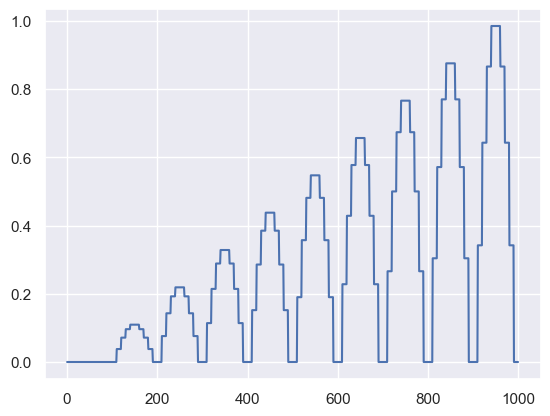

In [121]:
# plt.plot(a.flatten())

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(a,b)
# # plt.plot(a,c)
# #a**2+b**2+c**2

In [10]:
from sympy import im

import numpy as np
from math import pi, sin, cos
steps = 10

world_list = []
seen_in = set()
for theta in np.linspace(0, pi*.5, steps):
    for dist1 in np.linspace(-1,1,steps):
        a=np.cos(theta)*dist1
        b=np.sin(theta)*dist1
        left_over = (a**2+b**2)*-1+1
        for dist2 in np.linspace(-1,1,steps):
            c = left_over*dist2
            for which in range(2):
                tup = fit(ahat_vx=a,ahat_vy=b,bhat_vx=c,which=which)
                tup = [a,b,c] + list(tup)
                tup = [round(t,7) for t in tup]
                tup = tuple(tup)
                if tup not in seen_in:
                    seen_in.add(tup)
                    if all([im(t)==0 for t in tup]):
                        if tup[0] <= tup[2] and tup[0] <= tup[4] and tup[3] > tup[5]:
                            print("yep  ", tup)
                            world2 = deepcopy(world)
                            world2.circle_list[0].vx = tup[0]
                            world2.circle_list[0].vy = tup[1]
                            world2.circle_list[1].vx = tup[2]
                            world2.circle_list[1].vy = tup[3]
                            world2.circle_list[2].vx = tup[4]
                            world2.circle_list[2].vy = tup[5]
                            world2._tick_no_collision(1)
                            world2.figure().savefig(f"/deldir/world2_{len(world_list)}.png")
                            world_list.append(world2)
                        else:
                            # print("nope ", tup)
                            pass
                    else:
                        pass 
                        # print("imag ", tup)
pass


yep   (-0.2820513, -0.0, 0.4360012, 0.0852916, 0.8460500, -0.0852916)
yep   (-0.2820513, -0.0, 0.5328904, 0.1939496, 0.7491609, -0.1939496)
yep   (-0.2820513, -0.0, 0.6297796, 0.2217728, 0.6522717, -0.2217728)
yep   (-0.2820513, -0.0, 0.7266687, 0.2048778, 0.5553825, -0.2048778)
yep   (-0.2820513, -0.0, 0.8235579, 0.1264580, 0.4584934, -0.1264580)
yep   (-0.2307692, -0.0, 0.348801, 0.1536481, 0.8819682, -0.1536481)
yep   (-0.2307692, -0.0, 0.4484584, 0.2584767, 0.7823108, -0.2584767)
yep   (-0.2307692, -0.0, 0.5481159, 0.3002490, 0.6826534, -0.3002490)
yep   (-0.2307692, -0.0, 0.6477733, 0.3059829, 0.5829960, -0.3059829)
yep   (-0.2307692, -0.0, 0.7474307, 0.2779179, 0.4833385, -0.2779179)
yep   (-0.2307692, -0.0, 0.8470881, 0.2024550, 0.3836811, -0.2024550)
yep   (-0.1794872, -0.0, 0.2546801, 0.1543604, 0.9248071, -0.1543604)
yep   (-0.1794872, -0.0, 0.3565521, 0.2858608, 0.8229350, -0.2858608)
yep   (-0.1794872, -0.0, 0.4584242, 0.3447461, 0.7210630, -0.3447461)
yep   (-0.1794872, -0

In [73]:
round(0.0284271135016615*sqrt(2),7)

0.0402020